In [6]:
import tensorflow as tf

In [7]:
tf.__version__

'2.5.3'

In [5]:
x = [[1,1],[2,2]]
m = tf.matmul(x,x)
print(m)

tf.Tensor(
[[3 3]
 [6 6]], shape=(2, 2), dtype=int32)


In [7]:
m.numpy()

array([[3, 3],
       [6, 6]])

In [8]:
x = tf.cast(m,tf.float32)
print(x)

tf.Tensor(
[[3. 3.]
 [6. 6.]], shape=(2, 2), dtype=float32)


In [32]:
import math

import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import tensorflow.keras
import warnings
from scipy.fftpack import fft

x = np.arange(0, 100, 0.01)
y =  np.fft.rfft([math.sin(2  * np.pi * ele) for ele in x])

In [33]:
z = [ele.real  for ele in y]

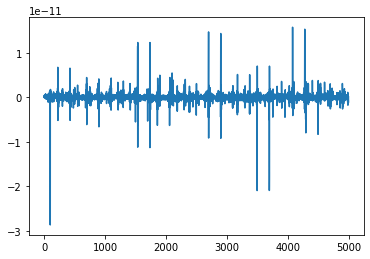

In [34]:
plt.plot(z)

In [18]:
import numpy as np  # 导入一个数据处理模块
import pylab as pl  # 导入一个绘图模块，matplotlib下的模块

pl.rcParams['font.sans-serif'] = 'SimHei'  # 用来正常显示中文标签
pl.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


sampling_rate = 8000  # 采样频率为8000Hz
fft_size = 512  # FFT处理的取样长度
t = np.arange(0, 10.0, 1.0 / sampling_rate)  # np.arange(起点，终点，间隔)产生1s长的取样时间
x = np.sin(500 * 2 * np.pi * t) + np.sin(1500 * 2 * np.pi * t)  # 两个正弦波叠加，156.25HZ和234.375HZ


In [26]:
# N点FFT进行精确频谱分析的要求是N个取样点包含整数个取样对象的波形。因此N点FFT能够完美计算频谱对取样对象的要求是n*Fs/N（n*采样频率/FFT长度），
# 因此对8KHZ和512点而言，完美采样对象的周期最小要求是8000/512=15.625HZ,所以156.25的n为10,234.375的n为15。
xs = x[:fft_size]  # 从波形数据中取样fft_size个点进行运算


(512,)

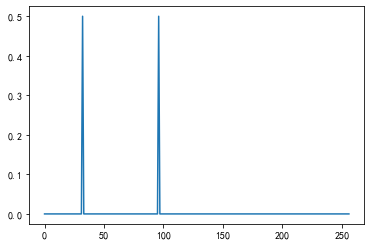

In [28]:
xf = np.fft.rfft(xs) / fft_size 
plt.plot(abs(xf))

In [35]:

xf = np.fft.rfft(xs) / fft_size  # 利用np.fft.rfft()进行FFT计算，rfft()是为了更方便对实数信号进行变换，由公式可知/fft_size为了正确显示波形能量
# rfft函数的返回值是N/2+1个复数，分别表示从0(Hz)到sampling_rate/2(Hz)的分。
# 于是可以通过下面的np.linspace计算出返回值中每个下标对应的真正的频率：
freqs = np.linspace(0, sampling_rate / 2, int(fft_size / 2) + 1)
# np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# 在指定的间隔内返回均匀间隔的数字
xfp = 20 * np.log10(np.clip(np.abs(xf), 1e-20, 1e100))
# 最后我们计算每个频率分量的幅值，并通过 20*np.log10()将其转换为以db单位的值。为了防止0幅值的成分造成log10无法计算，我们调用np.clip对xf的幅值进行上下限处理

# 绘图显示结果
pl.figure(figsize=(15, 4.5))
pl.subplot(211)
pl.plot(t[:fft_size], xs)
pl.xlabel(u"时间(S)")
pl.title(u"500Hz and 1500Hz 波形图和频谱图")
pl.subplot(212)
pl.plot(freqs, xfp)
pl.xlabel(u"频率(Hz)")
pl.subplots_adjust(hspace=0.4)
pl.show()


NameError: name 'xs' is not defined

In [38]:
import numpy as np

from scipy.fftpack import fft

import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 128)
y = np.sin(x) + 2*np.sin(3*x) + 2*np.cos(3*x) + 4*np.sin(15*x)



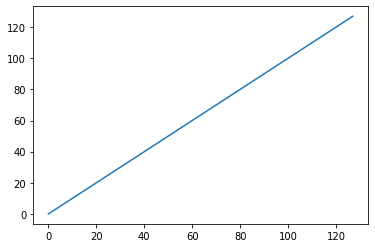

In [39]:
# 离散频率
xf = np.arange(len(y))

plt.plot(xf)

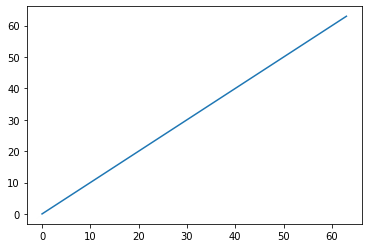

In [40]:
xf_half = xf[range(int(len(x)/2))]
plt.plot(xf_half)

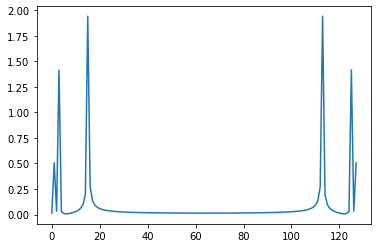

In [41]:
# 由于对称性，因此只取一半区域


# 执行完fft以后，对各频率的能量进行归一化处理
yf = abs(fft(y))/len(x)
plt.plot(yf)

In [ ]:

# 由于对称性，因此只取一半区间
yf_half = yf[range(int(len(x)/2))]

plt.plot(xf_half, yf_half)

plt.show()